In [1]:
import sys
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from src.utils import util as utl

global companies_set 

warnings.filterwarnings('ignore')

# 1 - Análise dos mercados

In [2]:
door_dir = glob.glob(r"D:\Documentos_D\UFCG\2021.2e\TCC\Project\analise_de_indicador_tcc_ufcg\data\processed\**\*" + ".csv", recursive=True)

df = pd.DataFrame()

for file_path in door_dir:
    temp_df = pd.read_csv(file_path)
    df = df.append(temp_df)

df = df.reset_index().drop(['index'], axis=1)
df['Volume_Venda'] = df['Volume_Venda'].round(2)


In [3]:
groups = df.groupby(['Empresa','Canal_Distribuicao','Mercado'])['Volume_Venda'].groups
dfs = []

companies = ['E1','E2','E3','E4']

for c in companies:
    temp_df = pd.DataFrame()
    for g in groups:
        g_df = df.groupby(['Empresa','Canal_Distribuicao','Mercado']).get_group(g)

        if g_df['Empresa'].unique()[0] == c:
            temp_df = temp_df.append(g_df)
        
    dfs.append(temp_df)

## 1.1 - Análise do volume de venda total das empresas, por canais e mercados

Empresa:  E1


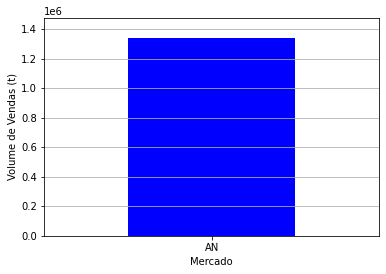

Empresa:  E2


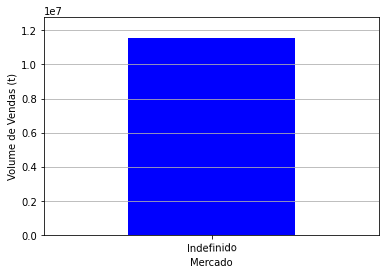

Empresa:  E2


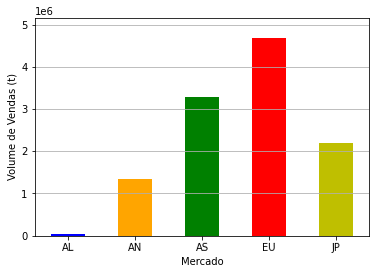

Empresa:  E2


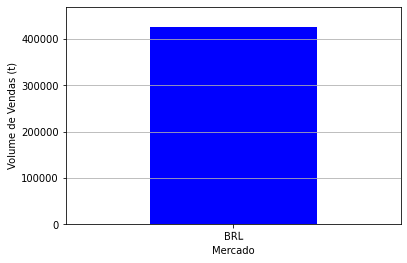

Empresa:  E3


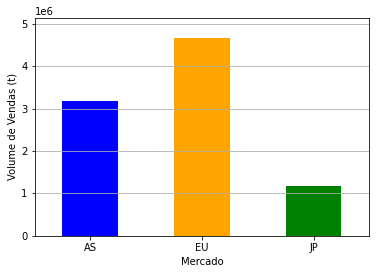

Empresa:  E4


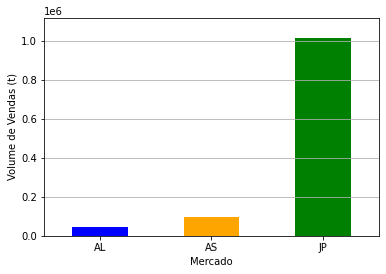

In [4]:
for d in dfs:
    channels = d.Canal_Distribuicao.unique()
    markets = d.Mercado.unique()

    for c in channels:
        company_name = d.Empresa.unique()[0]
        channel = c
        print("Empresa: ", company_name)

        df_groups = np.round(d[((d.Canal_Distribuicao == c) & (df.Data < '2022') & (df.Volume_Venda != 0))].groupby('Mercado')['Volume_Venda'].sum(),2)

        cmap = np.array(['b','orange','g','r','y'])
        ax = df_groups.T.plot(kind='bar', label='index', color=cmap).grid(axis='y')

        
        plt.ylabel("Volume de Vendas (t)")
        plt.xticks(rotation=1)
        
        scale_factor = 1.05
        ymin, ymax = plt.ylim() 
        plt.ylim(ymin * scale_factor, ymax * scale_factor) 

        save_path = r"D:\Documentos_D\UFCG\2021.2e\TCC\Project\analise_de_indicador_tcc_ufcg\reports\figures\market_analysis\total_sales" + "\\"
        plt.savefig(save_path + company_name + "_" + channel + '_total_sales.png', dpi=300, bbox_inches='tight')

        plt.show()        

## 1.2 - Análise do volume de venda total e médio das empresas

Empresa: E1 | Volume total de café vendido: 1337407.0 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 120 | Média de volume de café vendido: 11145.06 t | Empresas que atuam neste canal: C1 | Mercados presentes neste canal: AN
Empresa: E2 | Volume total de café vendido: 23559734.04 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 751 | Média de volume de café vendido: 31371.15 t | Empresas que atuam neste canal: C2 , C1 e C3 | Mercados presentes neste canal: AN , AS , EU , AL , JP , Indefinido e BRL
Empresa: E3 | Volume total de café vendido: 9022702.0 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 302 | Média de volume de café vendido: 29876.5 t | Empresas que atuam neste canal: C1 | Mercados presentes neste canal: AS , EU e JP
Empresa: E4 | Volume total de café vendido: 1147886.0 t | Período registrado das vendas: de 01/2012 até 07/2016 | Total de Registros de 

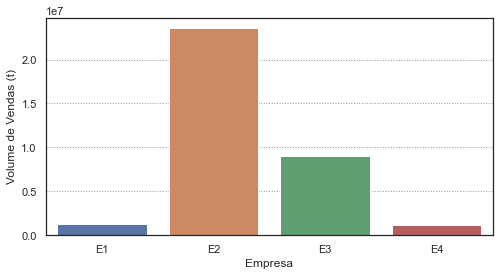

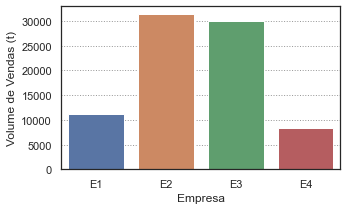

In [5]:
companies = ['E1', 'E2', 'E3', 'E4']
companies_sales_data = []

for company in companies:
    temp_df = df[((df.Empresa == company) & (df.Data < '2022') & (df.Volume_Venda != 0))].reset_index() # os zeros estão sendo desconsiderados

    company_sum = np.round(temp_df['Volume_Venda'].sum(),2)

    company_period_max_year = dt.datetime.strptime(str(temp_df['Data'].max()).split()[0], '%Y-%m-%d').strftime('%m/%Y')
    company_period_min_year = dt.datetime.strptime(str(temp_df['Data'].min()).split()[0], '%Y-%m-%d').strftime('%m/%Y')
    
    company_sales_registers = len(temp_df)
    
    company_mean = np.round(company_sum/company_sales_registers,2)

    companies_sales_data.append((company_sum, company_mean))

    company_channels = temp_df['Canal_Distribuicao'].unique()
    company_channels = utl.format_string(company_channels)

    company_markets = temp_df['Mercado'].unique()
    company_markets = utl.format_string(company_markets)

    print("Empresa: " + company + 
          " | Volume total de café vendido: " + str(company_sum) + " t" +
          " | Período registrado das vendas: de " + str(company_period_min_year) + " até " + str(company_period_max_year) +
          " | Total de Registros de Vendas: " + str(company_sales_registers) + 
          " | Média de volume de café vendido: " + str(company_mean) + " t" + 
          " | Empresas que atuam neste canal: " + company_channels + 
          " | Mercados presentes neste canal: " + company_markets)

# Total de volume de vendas:
totals = [companies_sales_data[0][0], companies_sales_data[1][0], companies_sales_data[2][0],  companies_sales_data[3][0] ]

# plt.title("Volume total de café vendido por empresa (em t)")
sns.set(rc = {'figure.figsize':(8,4)})
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})

grp = sns.barplot(companies, totals)
grp.yaxis.grid(True)

plt.xlabel('Empresa')
plt.ylabel('Volume de Vendas (t)')
plt.show()

# Média  de volume de vendas:
totals = [companies_sales_data[0][1], companies_sales_data[1][1], companies_sales_data[2][1],  companies_sales_data[3][1] ]

# plt.title("Volume médio de café vendido por empresa (em t)")
sns.set(rc = {'figure.figsize':(5,3)})
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})

grp = sns.barplot(companies, totals)
grp.yaxis.grid(True)

plt.xlabel('Empresa')
plt.ylabel('Volume de Vendas (t)')
plt.show()

## 1.3 - Análise do volume de venda total e médio dos canais

Canal: C1 | Volume total de café vendido: 23075157.02 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 680 | Média de volume de café vendido: 33934.05 t | Empresas que atuam neste canal: E1 , E2 , E3 e E4 | Mercados presentes neste canal: AN , Indefinido , AS , EU , JP e AL
Canal: C2 | Volume total de café vendido: 11567162.02 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 511 | Média de volume de café vendido: 22636.32 t | Empresas que atuam neste canal: E2 | Mercados presentes neste canal: AN , AS , EU , AL e JP
Canal: C3 | Volume total de café vendido: 425410.0 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 120 | Média de volume de café vendido: 3545.08 t | Empresas que atuam neste canal: E2 | Mercados presentes neste canal: BRL


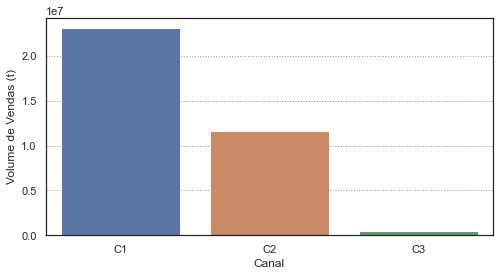

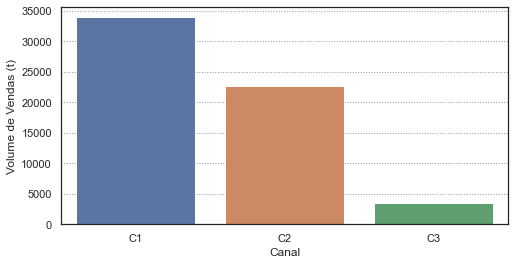

In [6]:
channels = ['C1', 'C2', 'C3']
channels_sales_data = []

for channel in channels:
    temp_df = df[((df.Canal_Distribuicao == channel) & (df.Data < '2022') & (df.Volume_Venda != 0))].reset_index() # os zeros estão sendo desconsiderados

    channel_sum = np.round(temp_df['Volume_Venda'].sum(),2)

    channel_period_max_year = dt.datetime.strptime(str(temp_df['Data'].max()).split()[0], '%Y-%m-%d').strftime('%m/%Y')
    channel_period_min_year = dt.datetime.strptime(str(temp_df['Data'].min()).split()[0], '%Y-%m-%d').strftime('%m/%Y')
    
    channel_sales_registers = len(temp_df)
    
    channel_mean = np.round(channel_sum/channel_sales_registers,2)

    channels_sales_data.append((channel_sum, channel_mean))

    channel_companies = temp_df['Empresa'].unique()
    channel_companies = utl.format_string(channel_companies)

    channel_markets = temp_df['Mercado'].unique()
    channel_markets = utl.format_string(channel_markets)

    print("Canal: " + channel + 
          " | Volume total de café vendido: " + str(channel_sum) + " t" +
          " | Período registrado das vendas: de " + str(channel_period_min_year) + " até " + str(channel_period_max_year) +
          " | Total de Registros de Vendas: " + str(channel_sales_registers) + 
          " | Média de volume de café vendido: " + str(channel_mean) + " t" + 
          " | Empresas que atuam neste canal: " + channel_companies + 
          " | Mercados presentes neste canal: " + channel_markets)
          
# Total  de volume de vendas:
totals = [channels_sales_data[0][0], channels_sales_data[1][0], channels_sales_data[2][0]]

# plt.title("Volume total de café vendido por canal (em t)")
sns.set(rc = {'figure.figsize':(8,4)})
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})

grp = sns.barplot(channels, totals)
grp.yaxis.grid(True)

plt.xlabel('Canal')
plt.ylabel('Volume de Vendas (t)')
plt.show()

# Média  de volume de vendas:
totals = [channels_sales_data[0][1], channels_sales_data[1][1], channels_sales_data[2][1]]

# plt.title("Volume médio de café vendido por canal (em t)")
sns.set(rc = {'figure.figsize':(8,4)})
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})

grp = sns.barplot(channels, totals)
grp.yaxis.grid(True)

plt.xlabel('Canal')
plt.ylabel('Volume de Vendas (t)')
plt.show()

## 1.4- Análise do volume de venda total e médio dos mercados

Mercado: AN | Volume total de café vendido: 2684879.0 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 231 | Média de volume de café vendido: 11622.85 t | Empresas que atuam neste canal: E1 e E2 | Canais presentes neste canal: C1 e C2
Mercado: AS | Volume total de café vendido: 6585006.01 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 280 | Média de volume de café vendido: 23517.88 t | Empresas que atuam neste canal: E2 , E3 e E4 | Canais presentes neste canal: C2 e C1
Mercado: EU | Volume total de café vendido: 9348420.01 t | Período registrado das vendas: de 01/2012 até 12/2021 | Total de Registros de Vendas: 239 | Média de volume de café vendido: 39114.73 t | Empresas que atuam neste canal: E2 e E3 | Canais presentes neste canal: C2 e C1
Mercado: AL | Volume total de café vendido: 82838.0 t | Período registrado das vendas: de 01/2012 até 01/2016 | Total de Registros de Vendas: 93 | Média de volume de

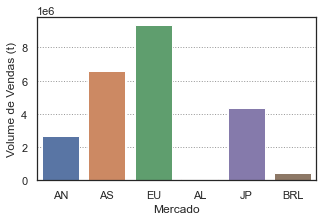

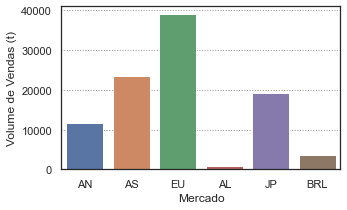

In [7]:
markets = ['AN', 'AS', 'EU', 'AL', 'JP', 'BRL']
markets_sales_data = []

for market in markets:
    temp_df = df[((df.Mercado == market) & (df.Data < '2022')  & (df.Volume_Venda != 0))] # os zeros estão sendo desconsiderados

    market_sum = np.round(temp_df['Volume_Venda'].sum(),2)

    market_period_max_year = dt.datetime.strptime(str(temp_df['Data'].max()).split()[0], '%Y-%m-%d').strftime('%m/%Y')
    market_period_min_year = dt.datetime.strptime(str(temp_df['Data'].min()).split()[0], '%Y-%m-%d').strftime('%m/%Y')
    
    market_sales_registers = len(temp_df)
    
    market_mean = np.round((market_sum/market_sales_registers), 2)

    markets_sales_data.append((market_sum, market_mean))

    market_companies = temp_df['Empresa'].unique()
    market_companies = utl.format_string(market_companies)

    market_channels = temp_df['Canal_Distribuicao'].unique()
    market_channels = utl.format_string(market_channels)

    print("Mercado: " + market + 
          " | Volume total de café vendido: " + str(market_sum) + " t" +
          " | Período registrado das vendas: de " + str(market_period_min_year) + " até " + str(market_period_max_year) +
          " | Total de Registros de Vendas: " + str(market_sales_registers) + 
          " | Média de volume de café vendido: " + str(market_mean) + " t"
          " | Empresas que atuam neste canal: " + market_companies + 
          " | Canais presentes neste canal: " + market_channels)

# Total de volume de vendas:          
totals = []
for data in markets_sales_data:
    totals.append(data[0])

# plt.title("Volume total de café vendido por mercado (em t)")
sns.set(rc = {'figure.figsize':(5,3)})
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})

grp = sns.barplot(markets, totals)
grp.yaxis.grid(True)

plt.xlabel('Mercado')
plt.ylabel('Volume de Vendas (t)')
plt.show()

# Média de Volume de vendas:          
totals = []
for data in markets_sales_data:
    totals.append(data[1])

# plt.title("Volume médio de café vendido por mercado (em t)")
sns.set(rc = {'figure.figsize':(5,3)})
sns.set_style("white", {"grid.color": ".6", "grid.linestyle": ":"})

grp = sns.barplot(markets, totals)
grp.yaxis.grid(True)

plt.xlabel('Mercado')
plt.ylabel('Volume de Vendas (t)')
plt.show()

# 2 - Criando novo DataFrame com todos os volumes de vendas, sequenciados por data, de cada mercado:

In [8]:
dfm = pd.DataFrame()
temp_df = df[((df.Mercado == 'AN') & (df.Empresa == 'E2'))].reset_index().drop(['index'],axis=1)

dfm['Data'] = temp_df.Data
dfm['Data'] = pd.to_datetime(dfm.Data)

# ----------------------------------------------------AN:
r1_bc = df[((df.Mercado == 'AN') & (df.Empresa == 'E1'))].Volume_Venda.astype(float).to_frame()
r1_br = df[((df.Mercado == 'AN') & (df.Empresa == 'E2'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)

dfm['AN'] = r1_bc.add(r1_br,axis=0)
# ----------------------------------------------------AS:
r2_bi = df[((df.Mercado == 'AS') & (df.Empresa == 'E3'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r2_br = df[((df.Mercado == 'AS') & (df.Empresa == 'E2'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)

r2_bt_temp = pd.DataFrame(columns=['Volume_Venda'])
values = []
for i in range(18):
    values.append(0)
r2_bt_temp['Volume_Venda'] = values
r2_bt = df[((df.Mercado == 'AS') & (df.Empresa == 'E4'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r2_bt = r2_bt.append(r2_bt_temp).reset_index().drop(['index'], axis=1)

dfm['AS'] = r2_bi.add(r2_br,axis=0)
dfm['AS'] = dfm['AS'] + r2_bt['Volume_Venda']
# ----------------------------------------------------EU:
r3_bi = df[((df.Mercado == 'EU') & (df.Empresa == 'E3'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r3_br = df[((df.Mercado == 'EU') & (df.Empresa == 'E2'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)

dfm['EU'] = r3_bi.add(r3_br,axis=0)
# ----------------------------------------------------AL:
r4_br_temp = pd.DataFrame(columns=['Volume_Venda'])
values = []
for i in range(13):
    values.append(0)
r4_br_temp['Volume_Venda'] = values
r4_br = df[((df.Mercado == 'AL') & (df.Empresa == 'E2'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r4_br = r4_br.append(r4_br_temp).reset_index().drop(['index'], axis=1)

r4_bt_temp = pd.DataFrame(columns=['Volume_Venda'])
values = []
for i in range(18):
    values.append(0)
r4_bt_temp['Volume_Venda'] = values
r4_bt = df[((df.Mercado == 'AL') & (df.Empresa == 'E4'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r4_bt = r4_bt.append(r4_bt_temp).reset_index().drop(['index'], axis=1)

dfm['AL'] = r4_br.add(r4_bt,axis=0)
# ----------------------------------------------------JP:
r5_bi_temp = pd.DataFrame(columns=['Volume_Venda'])
values = []
for i in range(56):
    values.append(0)
r5_bi_temp ['Volume_Venda'] = values
r5_bi = df[((df.Mercado == 'JP') & (df.Empresa == 'E3'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r5_bi = r5_bi_temp.append(r5_bi).reset_index().drop(['index'], axis=1)

r5_br = df[((df.Mercado == 'JP') & (df.Empresa == 'E2'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)

r5_bt_temp = pd.DataFrame(columns=['Volume_Venda'])
values = []
for i in range(18):
    values.append(0)
r5_bt_temp ['Volume_Venda'] = values
r5_bt = df[((df.Mercado == 'JP') & (df.Empresa == 'E4'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
r5_bt = r5_bt.append(r5_bt_temp ).reset_index().drop(['index'], axis=1)

dfm['JP'] = r5_bi.add(r5_br, axis=0)
dfm['JP'] = dfm['JP'] + r5_bt['Volume_Venda']
# ----------------------------------------------------BRL:
r6_br = df[((df.Mercado == 'BRL') & (df.Empresa == 'E2'))].Volume_Venda.reset_index().drop(['index'], axis=1).astype(float)
dfm['BRL'] = r6_br

dfm = dfm.set_index('Data')

display(dfm)

,AN,AS,EU,AL,JP,BRL
Data,,,,,,
2012-01-01,9498.0,27964.0,91330.0,1638.0,38716.0,4598.0
2012-02-01,22596.0,26910.0,75416.0,1248.0,59352.0,4192.0
2012-03-01,23424.0,67078.0,77030.0,1742.0,52372.0,4664.0
2012-04-01,21276.0,12912.0,78790.0,1118.0,0.0,4584.0
2012-05-01,22946.0,36676.0,64634.0,2704.0,98688.0,4754.0
...,...,...,...,...,...,...
2021-08-01,26312.0,50864.0,72716.0,0.0,25070.0,1724.0
2021-09-01,34846.0,55290.0,79856.0,0.0,23840.0,1948.0
2021-10-01,25258.0,75430.0,56878.0,0.0,28170.0,2014.0


## 2.1 - Análide se correlação entre os mercados

,AN,AS,EU,AL,JP,BRL
AN,1.000000,0.100667,-0.041107,-0.177764,0.020502,-0.228682
AS,0.100667,1.000000,-0.121394,-0.341871,0.143235,-0.216490
EU,-0.041107,-0.121394,1.000000,0.217195,0.111307,0.301616
AL,-0.177764,-0.341871,0.217195,1.000000,-0.034342,0.634975
JP,0.020502,0.143235,0.111307,-0.034342,1.000000,0.036679
BRL,-0.228682,-0.216490,0.301616,0.634975,0.036679,1.000000


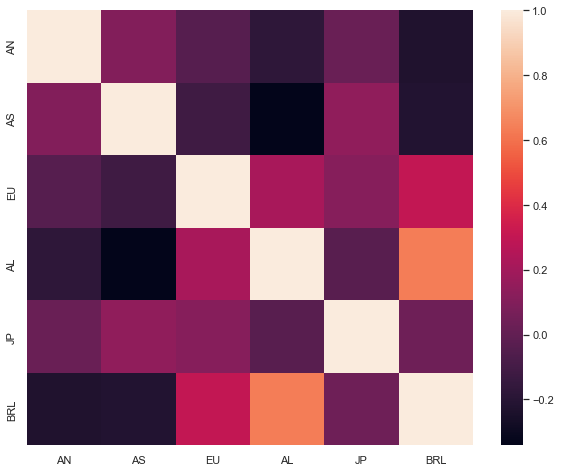

In [9]:
display(dfm.corr())

plt.figure(figsize = (10,8))
sns.heatmap(dfm.corr())

plt.savefig(save_path)
plt.show()

## 2.2 - Análide da série temporal "Volume de Vendas"

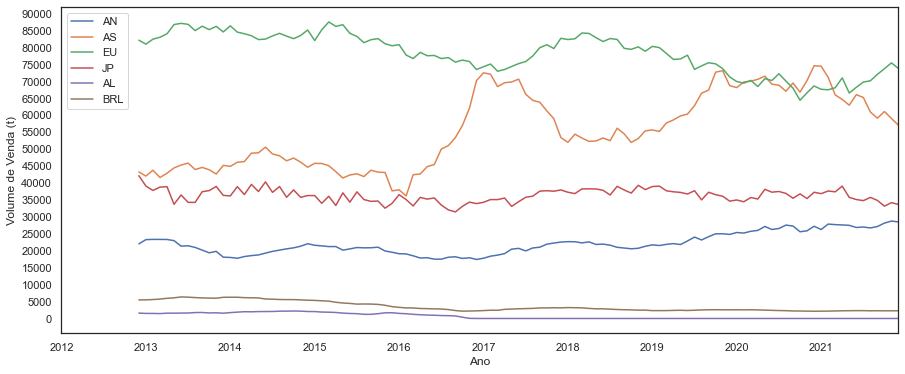

In [10]:
intvl = []
beg = 0
for i in range(0, 95000, 5000):
    intvl.append(i)

markets_names = dfm.keys().tolist()
markets_names[3], markets_names[4] = markets_names[4], markets_names[3] 

# Tirando ruído, para analisar as tendencias, usando medias moveis:
for market_name in markets_names:
    dfm[market_name].rolling(12).mean().plot(figsize=(15,6),legend=True, yticks=intvl)

path = r'D:\Documentos_D\UFCG\2021.2e\TCC\Project\analise_de_indicador_tcc_ufcg\reports\figures\time_series'
plt.xlabel('Ano')
plt.ylabel('Volume de Venda (t)')

plt.show()

### 2.1.1 - Análide da sazonalidade do Volume de Vendas

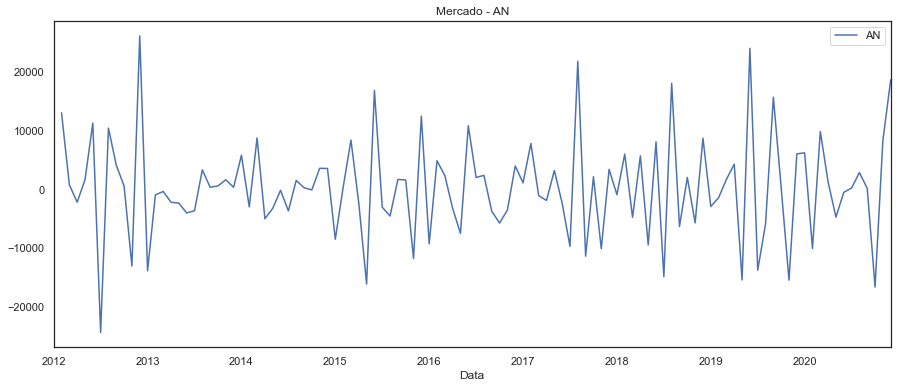

In [11]:
# Análise da sazonalidade, com diferenças sucessivas (valores negativos indicam que houve queda ente o valor anterior e o novo mês):
filtro = (dfm.index.year >= 2012) & (dfm.index.year <= 2020)

dfm[filtro].AN.diff().plot(figsize=(15,6),legend= True)

plt.title("Mercado - "+ 'AN')
plt.show()

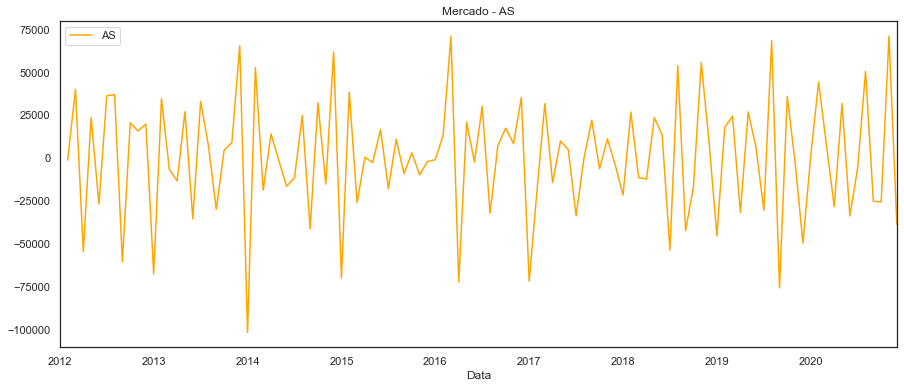

In [12]:
dfm[filtro].AS.diff().plot(figsize=(15,6),legend= True, color= 'orange')

plt.title("Mercado - "+ 'AS')
plt.show()

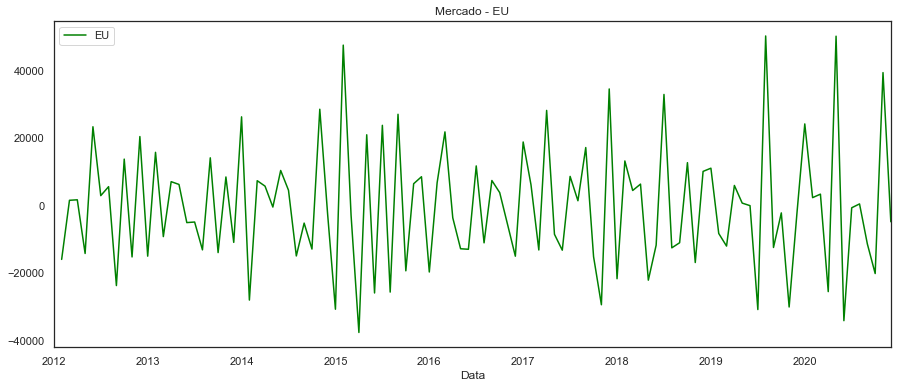

In [13]:
dfm[filtro].EU.diff().plot(figsize=(15,6),legend= True, color='green')

plt.title("Mercado - "+ 'EU')
plt.show()

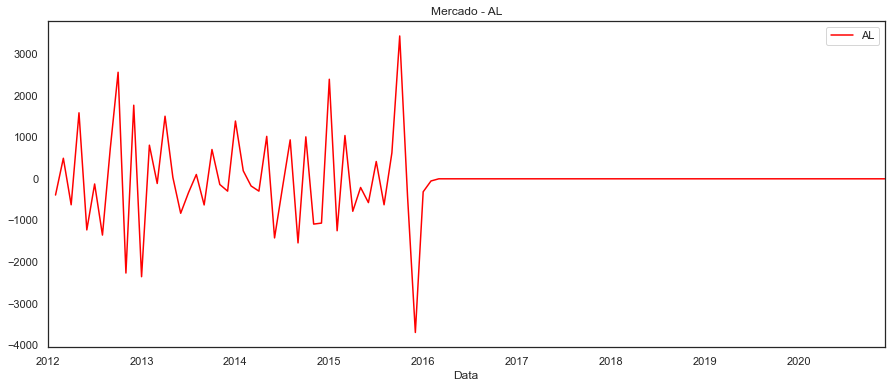

In [14]:
dfm[filtro].AL.diff().plot(figsize=(15,6),legend= True, color='red')

plt.title("Mercado - "+ 'AL')
plt.show()

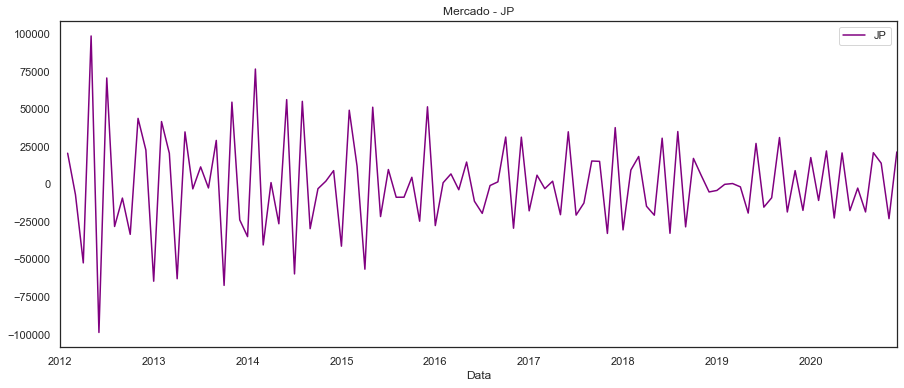

In [15]:
dfm[filtro].JP.diff().plot(figsize=(15,6),legend= True,color='purple')

plt.title("Mercado - "+ 'JP')
plt.show()

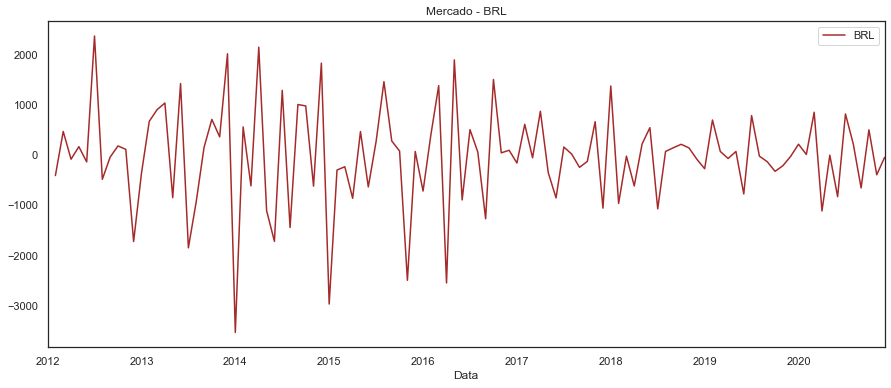

In [16]:
dfm[filtro].BRL.diff().plot(figsize=(15,6),legend= True, color='brown')

plt.title("Mercado - "+ 'BRL')
plt.show()